# -------------------MEDICAL INSURANCE PREDICTION------------------------

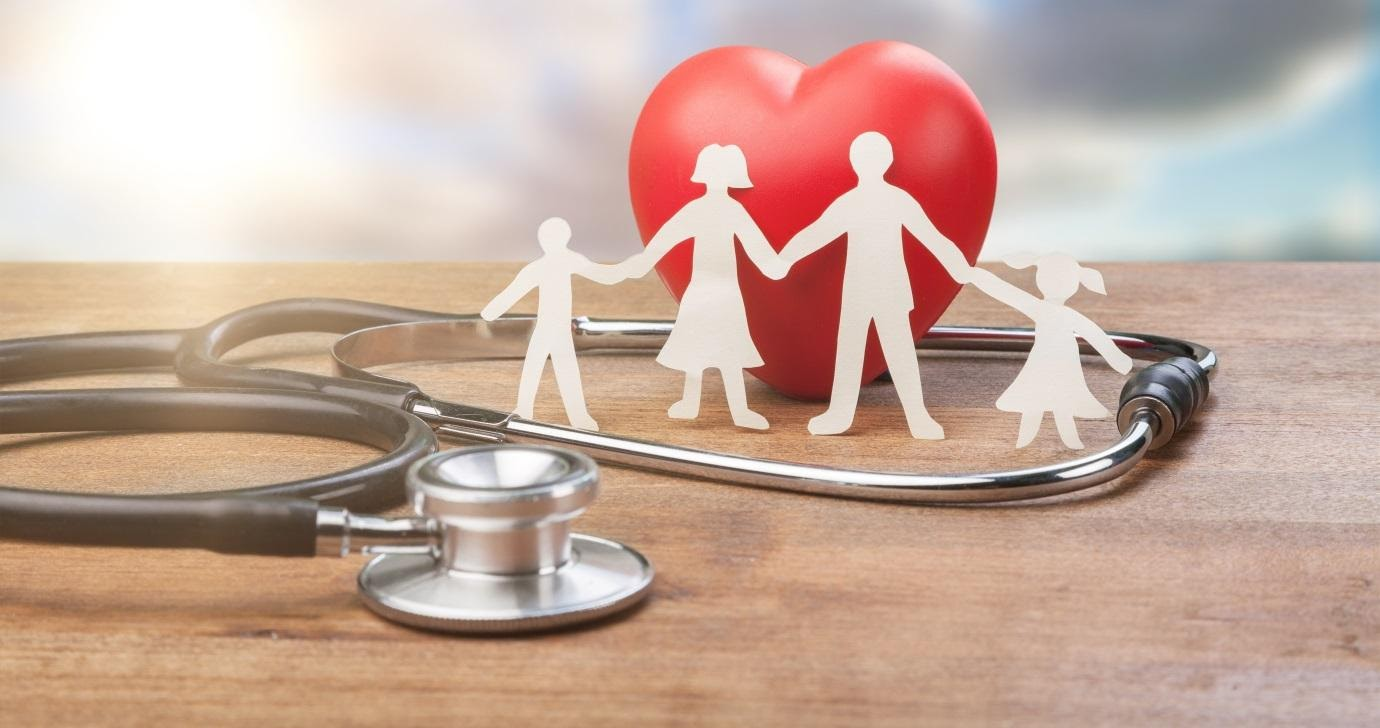

### AIM  :: TO PREDICT THE  INSURANCE CHARGES BASIS ON SOME FEATURES 

### DATASET SUMMARY 

>This Insurance Dataset contains (1338 rows * 7 columns )

### FEATURES

>AGE: AGE OF THE PERSON

>SEX: WHETHER THE PERSON IS FEMALE OR MALE

>BMI: BODY MASS INDEX OF THE PERSON PROVIDING AN UNDERSTANDING OF THE BODY

>CHILDREN: WHETHER THE PERSON HAS CHILDRENS OR NOT

>SMOKER: IS THE PERSON SMOKER OR NOT?

>REGION: THE BENIFICARY RESIDENTIAL AREA IN THE US , NORTHEAST , NORTHWEST, SOUTHEAST, SOUTHWEST


>CHARGES : CHARGES THAT APPLY FOR INSURANCE 

##### 0. STEP IS TO IMPORT THE NECESSARY LIBRARIES

In [3]:
import pandas as pd  
from sklearn.preprocessing import OneHotEncoder      # CONVERTING OBJECT INTO NUMERIC
import numpy as np                                   # FOR MATHEMATICAL PURPOSE                               
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split # FOR TRAINING AND SPLITTING THE DATA
from sklearn.linear_model import LinearRegression    # IMPORTING LINEAR REGRESSION ALGORITHM
import seaborn as sns                                # VISULAISATION PURPOSE
import matplotlib.pyplot as plt                      # VISUALISATIOM PURPOSE
from sklearn.ensemble import RandomForestRegressor   # SECOND ALGORITHM
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score # EVALUATION THE MODEL


###### 1. STEP IS TO COLLECT THE DATA AND WOOOOAHH!!! WE HAVE SUCCESSFULLY LOADED OUR DATA

In [4]:
df=pd.read_csv('/Users/kirandeepkaur/Downloads/datasets/insurance.csv')

In [5]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
# CHECKING INFORMATION ABOUT THE DATA LIKE PANDAS VERSION DATAYPES NULL VALUES 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [8]:
df['age'].min()

18

In [9]:
df['age'].max()

64

In [10]:
df['bmi'].unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

In [11]:
df['bmi'].min()

15.96

In [12]:
df['bmi'].max()


53.13

In [13]:
# GETTING INFO ABOUT THE STATISTICAL VERSION OF THE DATA
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## 3. DATA VISUALISATION (ESSENTIAL PART BEFORE APPLYING MODEL)

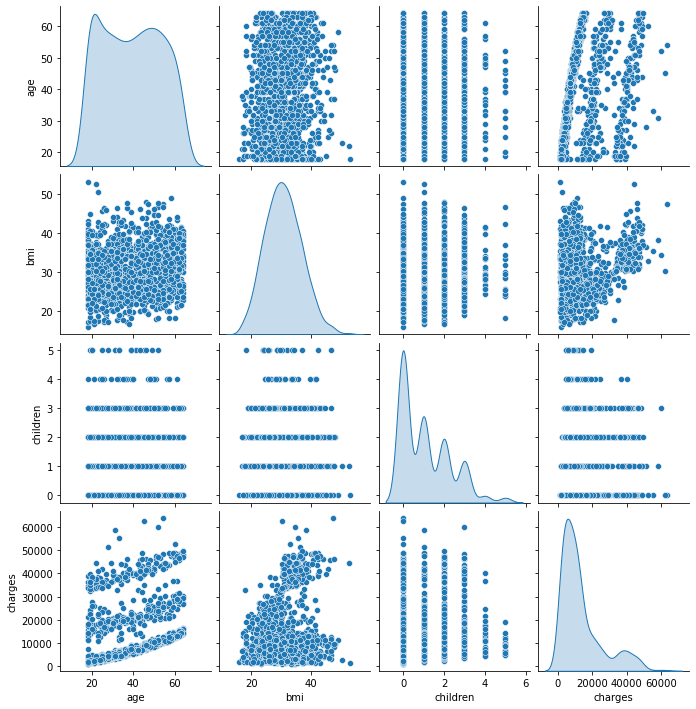

In [14]:
# VISUALISING PAIRPLOT TO SEE THE SKEWNESS OF THE FEATURES N
sns.pairplot(data=df,diag_kind='kde')

What do we see man??



>Charges and children are skewed

>Age shows posiitve correlation

>Bmi shows normal distribution

<AxesSubplot:>

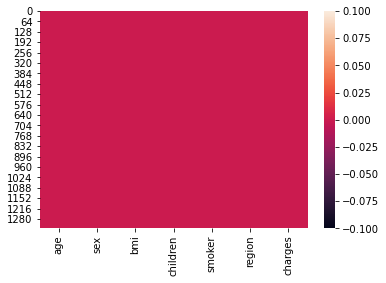

In [15]:
# CHEKCING NULL VALUES BY VISUALISING
sns.heatmap(df.isnull())

>.............THERE IS NO NULL VALUES IN THE DATASET.............

<AxesSubplot:xlabel='sex', ylabel='count'>

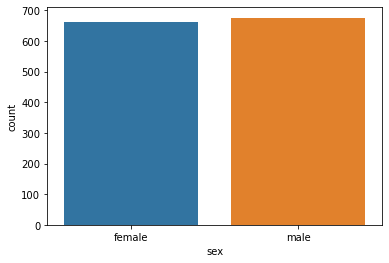

In [16]:
# Ratio of females and males want to apply for the insurance

sns.countplot(x='sex',data=df)

>.............SOMEWHERE THERE IS NO SUCH BIG DIFFERENCE IN THE RATIO OF FEMALES AND MALES............ 

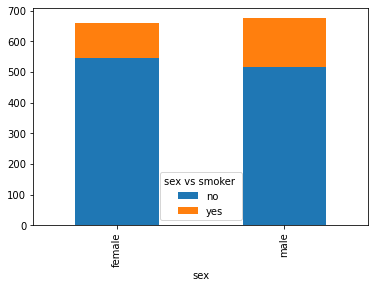

In [17]:
# 
ct = pd.crosstab(df.sex, df.smoker)

ct.plot.bar(stacked=True)
plt.legend(title='sex vs smoker ')

plt.show()


>..........ONLY FEW HAVE TO BE FOUND MORE SMOKERS THAN FEMALES.........

(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

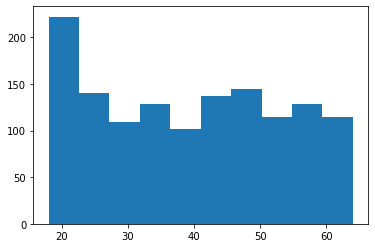

In [18]:

#ratio of age
plt.hist(x='age',data=df)

>...............SO MOST OF THE APPLICANTS ARE OF AGE SOMEWHERE 18 TO 20...................

<AxesSubplot:xlabel='children', ylabel='count'>

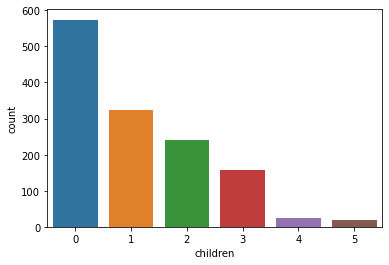

In [19]:
# how many of them having childrens
sns.countplot(x='children',data=df)



# most of them dont have childrens who want the insurance 

>.........MOST OF THE APPLICANTS APPLYING DOES NOT HAVE CHILDREN.........

<AxesSubplot:>

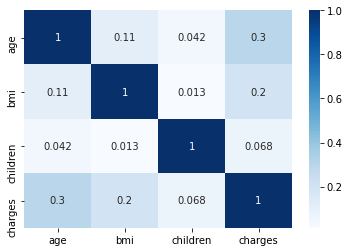

In [20]:
# CHECKING FOR THE CORRELATION
sns.heatmap(df[['age','bmi','children','charges']].corr(),cmap='Blues',annot=True)

## 4.NOW ITS TIME TO DO SOME FEATURE ENGINEERING BUT NOT ALOT

In [24]:
# CHANGING SEX COLUMN TO NUMERIC
df["sex"] = df["sex"].astype('category').cat.codes

In [25]:
X.dtypes

NameError: name 'X' is not defined

In [26]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [27]:
df.dtypes

age           int64
sex            int8
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [28]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [29]:
# DONE GETDUMMIES TO DISTRIBUTE THE COLUMNS IN 3 ERA'S
region=pd.get_dummies(df.region, prefix='location')
df = pd.concat([df,region],axis=1)
df.drop(columns='region', inplace=True)

In [30]:
df

,age,sex,bmi,children,smoker,charges,location_northeast,location_northwest,location_southeast,location_southwest
0,19,0,27.900,0,yes,16884.92400,0,0,0,1
1,18,1,33.770,1,no,1725.55230,0,0,1,0
2,28,1,33.000,3,no,4449.46200,0,0,1,0
3,33,1,22.705,0,no,21984.47061,0,1,0,0
4,32,1,28.880,0,no,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,10600.54830,0,1,0,0
1334,18,0,31.920,0,no,2205.98080,1,0,0,0
1335,18,0,36.850,0,no,1629.83350,0,0,1,0
1336,21,0,25.800,0,no,2007.94500,0,0,0,1


In [31]:
# CHANGING SMOKER COLUMN TO NUMERIC 
df.smoker.replace(to_replace=['yes', 'no'], value=[1,0], inplace=True)

In [32]:
df

,age,sex,bmi,children,smoker,charges,location_northeast,location_northwest,location_southeast,location_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


## 5. THE MAIN FIGHT STARTS FROM HERE APPLYING MODEL

In [33]:
X=df.drop("charges",axis=1)
y=df[['charges']]

In [38]:
#SPLITTING DATA
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [39]:
lr=LinearRegression()

In [40]:
lr.fit(X_train,y_train)

LinearRegression()

In [41]:
lr.score(X_test,y_test)

0.740598931692721

In [42]:
lr.score(X_train,y_train)

0.7545557492633161

In [43]:
rf=RandomForestRegressor()

In [44]:
rf.fit(X_train,y_train)

<ipython-input-44-d6d9475b85dc>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestRegressor()

In [45]:
rf.score(X_test,y_test)

0.8316531440338132

In [46]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [46]:
def show_scores(model):
    train_preds = lr.predict(X_train)
    val_preds = lr.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
             "Valid MAE": mean_absolute_error(y_valid, val_preds),
             "Training R^2": r2_score(y_train, train_preds),
             "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

In [58]:
np.random.seed(42)
data_one = df.sample(frac=1)

X = data_one.drop("charges", axis=1)
y = data_one["charges"]

train_split=round(0.7*len(data_one))
valid_split=round(train_split+0.15*len(data_one))
X_train,y_train=X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]


m=LinearRegression({'copy_X': True, 'fit_intercept' :True, 'n_jobs' :True,  'normalize':True})
m.fit(X_train,y_train)


y_preds=m.predict(X_valid)
baseline_metrics=show_scores(lr)

baseline_metrics

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass fit_intercept={'copy_X': True, 'fit_intercept': True, 'n_jobs': True, 'normalize': True} as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


{'Training MAE': 4237.78024352383,
 'Valid MAE': 4459.401217402438,
 'Training R^2': 0.7635359307042947,
 'Valid R^2': 0.6565660330490295}

In [62]:
m.score(y_valid,y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[ 9625.92    29186.48236 21098.55405  4243.59005 14571.8908  19964.7463
 11356.6609   7153.5539   2007.945   13457.9608  12913.9924  12730.9996
  5385.3379   6775.961   42856.838   29141.3603   4877.98105  1615.7667
  1253.936    1515.3449   1646.4297  19107.7796  24915.04626 36910.60803
 14313.8463  19539.243    9361.3268   7173.35995  2902.9065   6496.886
  7633.7206   3956.07145 17081.08     5662.225    6117.4945  11381.3254
 20878.78443  8604.48365  3693.428   11534.87265 34303.1672  16085.1275
 12741.16745 13393.756    6686.4313   3410.324    2102.2647   6500.2359
 17560.37975 14410.9321   3481.868    7441.053   24667.419   55135.40209
 12233.828    1621.8827   1141.4451   3393.35635  1635.73365 39722.7462
  7144.86265 26140.3603  17748.5062   1639.5631  21344.8467   3866.8552
 10713.644   21232.18226  2219.4451  23568.272   36219.40545 11554.2236
  8442.667   28287.89766  1972.95     9222.4026   9386.1613  11657.7189
 18838.70366  8068.185   12646.207   13352.0998  25309.489    8124.4084
  1842.519   10115.00885 13126.67745 13224.05705  2211.13075  8023.13545
  6664.68595 11743.9341   2497.0383   4992.3764   8527.532    1631.6683
  2498.4144   4894.7533  36837.467    4766.022    1625.43375  4661.28635
 20773.62775  4934.705    8539.671   13451.122    8825.086    5428.7277
 24476.47851  4350.5144  10461.9794   7077.1894   3353.284   11729.6795
  3736.4647  11244.3769  45702.02235  2741.948    2395.17155  9634.538
 12032.326   25517.11363 36397.576   12557.6053  10118.424   21472.4788
  3558.62025 11735.87905 24873.3849   4931.647   14426.07385  7050.0213
 11512.405    8413.46305 10928.849   35147.52848 15518.18025 10797.3362
  1909.52745  3268.84665 26392.26029 16776.30405 26018.95052 40904.1995
 28468.91901  3277.161   11879.10405  4719.52405 11987.1682  14451.83515
  5926.846   46718.16325  9225.2564   2302.3      3062.50825 21880.82
  2201.0971  11289.10925 11272.33139  5438.7491  20167.33603 12949.1554
  7727.2532  34166.273    4058.1161   7046.7222  21348.706   41999.52
  2680.9493   3704.3545   6653.7886   7626.993    6334.34355  6640.54485
 11455.28    14254.6082  30942.1918   3861.20965 13844.7972  37742.5757
  7789.635   10269.46    20984.0936  62592.87309  6406.4107   5383.536
  1981.5819   1969.614    4260.744   19798.05455 11093.6229   3443.064
 26926.5144  34617.84065  6184.2994   1633.9618  24869.8368   5125.2157
  1744.465    6666.243   13143.33665].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

##### AS I'M GETTING THE LAST ACCURACY 77% 